# K Nearest Neighbors
An example of how to scale data, find k, and cross validate.

This data contains measurements of various weather attributes and then classifies the general type of day.

## 1. Library Imports and Data Loading

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv("data/weather.csv")

## 2. Understanding the Data

In [9]:
# df.info()
# df.head()
#df.describe()
df["weather"].value_counts()

weather
Cloudy    151
Stormy    124
Foggy     124
Sunny     101
Name: count, dtype: int64

We can create a multi-class classification model using the feautures and label "weather"

## 3. Feature Selection

Not Shown: Feature Selection indicated that ["precipitation", "wind_speed", "temperature"] are most indicative of weather.

## 4. Extracting Data

In [10]:
# Extract Data
features = ['temperature', 'precipitation', 'wind_speed']
X = df[features]
y = df["weather"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

## 5. Scaling Data

In [15]:
# We determine how to scale our data based only on training data
scaler = MinMaxScaler()
scaler = scaler.fit(X_train)

# Transform the X values and save them back into dataframes
X_train = pd.DataFrame(scaler.transform(X_train), columns=features)
X_test = pd.DataFrame(scaler.transform(X_test), columns=features)

## 6. Hyperparameter Tuning
Selecting K with 5-fold cross validation

In [19]:
# Define a range of k values to test
k_values = list(range(1, 20, 2)) #Odd values from 1 to 20

# Initialize an empty list four our scores
cv_scores = []

# Preform 5-fold cross validation for each k value
for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring="accuracy")
    print(k, scores)
    cv_scores.append(scores.mean())

1 [0.725  0.8125 0.8375 0.6875 0.7125]
3 [0.7125 0.8    0.8    0.7    0.75  ]
5 [0.7125 0.7875 0.8375 0.675  0.75  ]
7 [0.7    0.7625 0.825  0.6875 0.775 ]
9 [0.725  0.7875 0.8    0.675  0.775 ]
11 [0.725  0.775  0.8125 0.6875 0.8   ]
13 [0.7125 0.775  0.8375 0.7125 0.8125]
15 [0.7125 0.775  0.825  0.7125 0.8   ]
17 [0.7125 0.7625 0.8625 0.6875 0.775 ]
19 [0.7125 0.8    0.8375 0.7125 0.775 ]


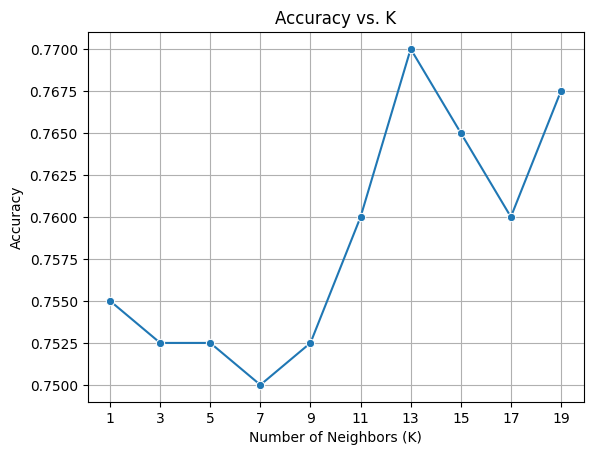

In [20]:
# Plot our Cross Validation Results
sns.lineplot(x=k_values, y=cv_scores, marker='o')
plt.title('Accuracy vs. K')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(True)

## 7. Building our Model

In [24]:
# Create the model
model = KNeighborsClassifier(n_neighbors=13)

# Train the model
model = model.fit(X_train, y_train)

## 8. Evaluation

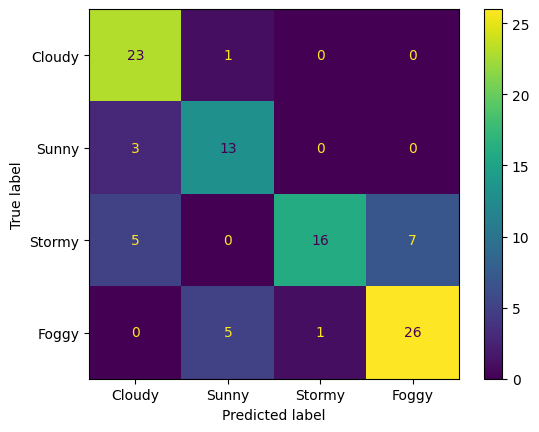

In [25]:
# Make predictions on the test data
y_pred = model.predict(X_test)

# Create a confusion matrix
labels = df["weather"].unique()
conf_mat = confusion_matrix(y_test, y_pred, labels=labels)

disp = ConfusionMatrixDisplay(conf_mat, display_labels=labels)
disp.plot()

In [26]:
# Accuracy as shown by the confusion matrix
model.score(X_test, y_test)

0.78